# Gradient Descent

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage import draw
from scipy import signal
from scipy import misc
from PIL import Image
import pywt
import pywt.data
from utils_wavelet import *
import scipy.stats as stats

In [2]:
def whereAprox(array,value,error):
    out, = np.where((array>value-error)&(array<value+error))
    return int(out)

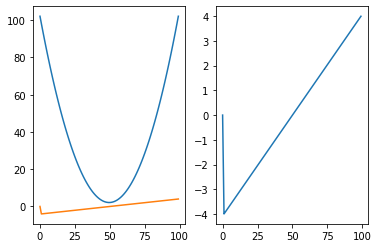

In [3]:
x = np.linspace(0,100,100)
a=0.04
h=50
k=2.12
g = a*(x-h)**2+k
dg = np.zeros(len(x))
for z in range(len(x)):
    dg[z] = g[z]-g[z-1]
dg[0] = 0

plt.figure()
plt.subplot(1,2,1)
plt.plot(g)
plt.plot(dg)
plt.subplot(1,2,2)
plt.plot(dg)
plt.show()

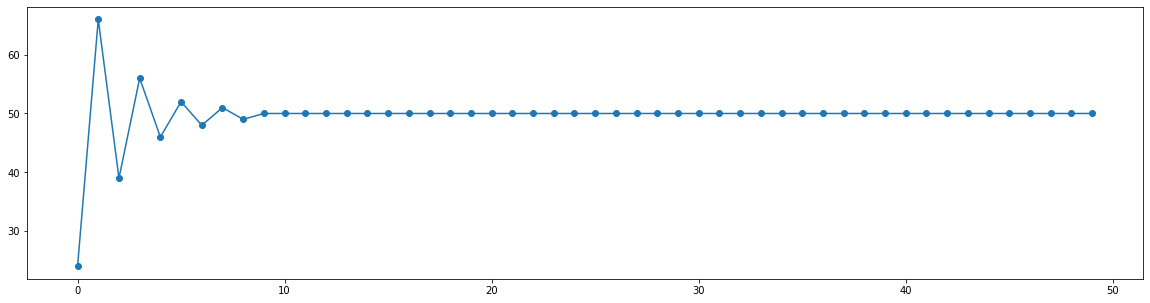

In [4]:
xk = 90
gk = 1000
ak = 20

xk_array = np.zeros(50)
for i in range(len(xk_array)):
    xk = int(xk - ak*dg[xk])
    # gk = g[xk]
    xk_array[i] = xk

plt.figure(figsize=(20,5))
plt.plot(xk_array,'o-')
plt.show()

## V2

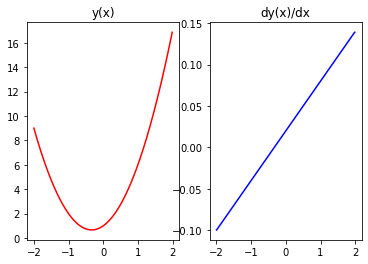

In [5]:
def parabola(x):
    return 3*x*x+2*x+1

x = np.arange(-2.0, 2.0, 0.01)
y = parabola(x)

g = np.gradient(y)

plt.figure()
plt.subplot(1,2,1)
plt.plot(x, y,'r-')
plt.title('y(x)')
plt.subplot(1,2,2)
plt.title('dy(x)/dx')
plt.plot(x, g,'b-')
plt.show()

In [6]:
print(whereAprox(x,1.5,1e-5))
print(g[350])


350
0.11000000000000298


0.3999999999999999 2.2799999999999994 8.47
-0.040000000000000036 0.9248 1.3551999999999995
-0.216 0.707968 0.2168319999999999
-0.2864 0.67327488 0.03469312000000002
-0.31456 0.6677239808 0.00555089920000007
-0.32582400000000006 0.666835836928 0.0008881438719999801
-0.33032959999999995 0.66669373390848 0.00014210301952000126
-0.3321318399999999 0.6666709974253568 2.2736483123120266e-05
-0.3328527359999999 0.666667359588057 3.637837299841351e-06


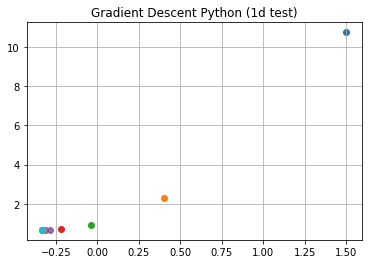

In [7]:
alpha = 0.1 # learning rate
nb_max_iter = 100 # Nb max d'iteration
eps = 1e-5 # stop condition

x0 = 1.5 # start point
y0 = parabola(x0)
plt.scatter(x0, parabola(x0))

cond = eps + 10.0 # start with cond greater than eps (assumption)
nb_iter = 0 
tmp_y = y0
while cond > eps and nb_iter < nb_max_iter:
    x0 = x0 - alpha * misc.derivative(parabola, x0)
    y0 = parabola(x0)
    nb_iter = nb_iter + 1
    cond = abs( tmp_y - y0 )
    tmp_y = y0
    print (x0,y0,cond)
    plt.scatter(x0, y0)

plt.title("Gradient Descent Python (1d test)")
plt.grid()
plt.show()